Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "MUHAMMAD ABDURREHMAN ASIF"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomly built BSTs

## Part A. Average number of comparisons when searching

## Question 0 [time estimate: 1 minute] 

Paste in the working code from last session's PCW for the class Node, which contains the methods for insertion, searching, and deletion. 



In [13]:
##
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node

    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def to_string(self): 
        print('self.data', self.data)
        root=self
        if not root: 
            return 'Nil'
        else: 
            r = root.r_child.to_string() if root.r_child else 'Nil'
            l = root.l_child.to_string() if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'
    
    
    
    def search(self, value):
        node = self
        if node == None or value == node.data:   #returns root node in required or empty case
            return node
        
        elif value < node.data and node.l_child != None: #recursively calls method on left side
            return node.l_child.search(value)
        
        elif value > node.data and node.r_child != None: #recursively searches right side
            return node.r_child.search(value) 
        return None 
  

    def transplant(self, u, v): #assisting with deleting
        node = self             #assign node as the self val
        if u.parent == None:    #edge case
            node = v
            
        elif u == u.parent.l_child:  #transplants root v with root u following BST properties
            u.parent.l_child = v
        else: 
            u.parent.r_child = v
        if v != None:
            v.parent = u.parent
        return node
    
    def inorder(self):
        if self.data!=None:   #edge case
            if self.l_child!=None:
                self.l_child.inorder()   #verifies left side is following BST properties
            if self.r_child!=None: 
                self.r_child.inorder()   #verifies right side is following BST properties

    def delete(self, value):
        z = self.search(value)                    #node we wish to delete
        if z!= None and z.l_child == None: 
            self = self.transplant(z, z.r_child)   #replaces node with right child
        elif z!= None and z.r_child == None:
            self = self.transplant(z,z.l_child)   #if right child doesn't exist, replace with left child
        else:
            y = z.r_child.minimum()               #find successor
            if y.parent != z:
                self = self.transplant(y,y.r_child)   #in the case of having both child nodes
                y.r_child = z.r_child
                y.r_child.parent = y
            self = self.transplant(z,y)
            y.l_child = z.l_child
            y.l_child.parent = y
        return self



## Question 1 [time estimate: 5 minutes]

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [18]:
def depth(root, node):
    """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
    """
    if node == root:        #depth of root
        return 0
    
    parent = node.parent    #parent node being selected
    depth = 1               #depth if beyond the root
    
    while parent != root:   #while the parent is not the root
        depth += 1          #increase in depth
        parent = parent.parent  #parent is renamed
        
    return depth


bst = 
depth()

In [92]:
# Testing code 
import math 
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
        print(bst.to_string())
#        insert(bst, node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))


self.data 15
self.data 6
Node(15 L: Node(6 L: Nil R: Nil) R: Nil)
self.data 15
self.data 18
self.data 6
Node(15 L: Node(6 L: Nil R: Nil) R: Node(18 L: Nil R: Nil))
self.data 15
self.data 18
self.data 6
self.data 3
Node(15 L: Node(6 L: Node(3 L: Nil R: Nil) R: Nil) R: Node(18 L: Nil R: Nil))
self.data 15
self.data 18
self.data 6
self.data 7
self.data 3
Node(15 L: Node(6 L: Node(3 L: Nil R: Nil) R: Node(7 L: Nil R: Nil)) R: Node(18 L: Nil R: Nil))
self.data 15
self.data 18
self.data 17
self.data 6
self.data 7
self.data 3
Node(15 L: Node(6 L: Node(3 L: Nil R: Nil) R: Node(7 L: Nil R: Nil)) R: Node(18 L: Node(17 L: Nil R: Nil) R: Nil))
self.data 15
self.data 18
self.data 20
self.data 17
self.data 6
self.data 7
self.data 3
Node(15 L: Node(6 L: Node(3 L: Nil R: Nil) R: Node(7 L: Nil R: Nil)) R: Node(18 L: Node(17 L: Nil R: Nil) R: Node(20 L: Nil R: Nil)))
self.data 15
self.data 18
self.data 20
self.data 17
self.data 6
self.data 7
self.data 3
self.data 2
Node(15 L: Node(6 L: Node(3 L: Node(2 

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [40]:
def avg_cmp(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    n : float
        Average number of comparisons
        
    """
    #initializing starting variables
    comparisons=[]   
    node=bst 
    root=bst
    
    def total_cmp(node): 
        if node != None:  #recursion until no more nodes are left
            
            total_cmp(node.l_child)                  #run comparisons on left subtree
            comparisons.append(depth(root, node)+1) 
            total_cmp(node.r_child)                  #run comparisons on right subtree
            
    total_cmp(node)                                  #recursive call
    n=sum(comparisons)/len(comparisons)          #taking an average
    
    return n 


bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
        
avg_cmp(bst)

2.7777777777777777

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 

## Question 1 [time estimate: 10 minutes]

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [69]:
def max_depth(bst):
    """
    Finds the maximum depth of node in a BST.
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    h : int
        The maximum depth in a BST
        
    """
    #initializing starting variables
    height=[-1]                      #acts as a sort of 'sentinel' since no depth can be smaller than 0
    node = bst
    root = bst
    
    def depth_counter(node): 
        if node != None:      #recursion until no more nodes are left
            
            depth_counter(node.l_child)         #run counter on left subtree
            total_depth = depth(root,node)      #call depth function and name the call
            if total_depth > max(height):       #compare the maximum height to current total depth
                height.append(total_depth)      #replace if current height has crossed prior maximum
                
            depth_counter(node.r_child)         #run counter on right subtree
            
    depth_counter(node)                          
    n = max(height) 
    return n


#test
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
        
max_depth(bst)

3

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [70]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Parameters
    ----------
    bst
        A Node, root of the BST
    
    Returns
    -------
    avg_d : float
        Average depth of the BST
        
    """
    average_depth = avg_cmp(bst) - 1
    return average_depth

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3 [time estimate: 10 minutes]
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

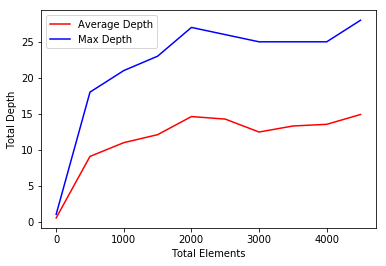

In [76]:
import random
#empty lists to store
avg_depths = []
max_depths = []
x = []

#creating a range of elements to check scaling of these statistics
for n in range(2,5000,500):
    x.append(n)
    nodes = [Node(i) for i in range(0,n)]
    random.shuffle(nodes)
    #generating random bst
    bst = None
    for node in nodes:
        if not bst:
            bst = node
        else:
            bst.insert(node)
    #calling function to check average depth and max depth
    avg_depths.append(avg_depth(bst))
    max_depths.append(max_depth(bst))

import matplotlib.pyplot as plt
plt.plot(x,avg_depths, label="Average Depth", color='red')
plt.plot(x,max_depths, label="Max Depth", color='blue')
plt.xlabel("Total Elements")
plt.ylabel("Total Depth")
plt.legend()
plt.show()

As we see by the figure above, the scaling of the average and the max follows a similar pattern, however, it differs in terms of the scale itself. We cacn see that up til 1000 elements, both average and max depth increase significantly (almost 10x the starting value). After this however, it slows down but still increases till the 2000 element mark. Then it sort of saturates. 

If we decide to scale these even further, it is expected that slow but steady growth will be observed which is natural because the way the BST is designed is that it requires a growing number of inputs to begin populating the next generation of children. Even if it doesn't need to be completely "balanced", only edge cases would result in a severely unbalanced tree that continues to grow in the shape of a linked list. Therefore, the averages and max depths would grow at an increasingly slower rate.


## Question 4 [time estimate: 7 minutes]

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [80]:
avg_depths = []
max_depths = []
N = []

#creating a range of elements to check scaling of these statistics
for n in range(2,10000,500):
    N.append(n)
    nodes = [Node(i) for i in range(0,n)]
    random.shuffle(nodes)
    #generating random bst
    bst = None
    for node in nodes:
        if not bst:
            bst = node
        else:
            bst.insert(node)
    #calling function to check average depth and max depth
    avg_depths.append(avg_depth(bst))
    max_depths.append(max_depth(bst))

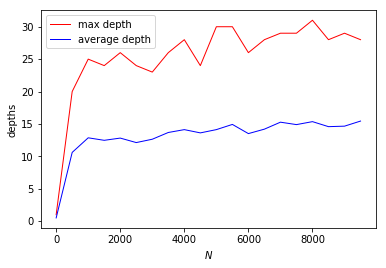

In [81]:
plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()

Similar graph as before, however, just scaled up so we can see that the predictions I made hold true. 